Data points indexed by time are called time series data. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist. This notebook explores data from the stock market, particularly Apple, Amazon, Google, and Microsoft. By using Seaborn and Matplotlib, we will learn how to get stock information using yfinance. Based on a stock's past performance history, we will examine a few ways to evaluate its risk. Using the Long Short Term Memory (LSTM) method, we will also be predicting future stock prices! Our goal is to answer the following questions along the way: 1.) Over time, how did the stock's price change? 2.) On average, what was the stock's daily return? 3.) What was the moving average of the various stocks? 4.) How was the correlation between different stocks? 5.) How much value will we be putting at risk by investing in a particular stock?     6.) How can we attempt to The first step is to get the data and load it into memory in order to predict future stock behavior. Yahoo Finance will provide us with stock data. You can find compelling investments using Yahoo Finance's financial market data and tools. We will download market data from Yahoo Finance using the yfinance library, which offers a threaded and Pythonic way to do so.

What was the change in price of the stock overtime? We'll look at how to request stock information with Pandas and how to analyze basic stock attributes.

In [1]:
!pip install -q yfinance

Using the pip package manager, you can install the "yfinance" package. 

In plain English, the code requests the installation of a software library called "yfinance." This library is likely used to retrieve and access financial data. By using the "-q" flag, the installation process will be quiet, displaying no unnecessary information or prompts. "Pip" is a Python package manager that simplifies the process of installing and managing software packages. Using this code, you can use the "yfinance" library silently in your Python programs.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-06-14,126.699997,126.949997,124.120003,126.419998,126.419998,52422500,AMAZON
2023-06-15,125.209999,127.690002,124.320000,127.110001,127.110001,60458500,AMAZON
2023-06-16,127.709999,127.900002,125.300003,125.489998,125.489998,84188100,AMAZON
2023-06-20,124.970001,127.250000,124.500000,125.779999,125.779999,56930100,AMAZON
2023-06-21,125.639999,126.730003,123.849998,124.830002,124.830002,52137700,AMAZON
2023-06-22,125.309998,130.330002,125.139999,130.149994,130.149994,90354600,AMAZON
2023-06-23,129.110001,130.839996,128.279999,129.330002,129.330002,71855200,AMAZON
2023-06-26,129.330002,131.490005,127.099998,127.330002,127.330002,59989300,AMAZON
2023-06-27,128.630005,130.089996,127.550003,129.179993,129.179993,46801000,AMAZON


Several Python libraries are imported, including pandas, numpy, matplotlib, and seaborn, that are commonly used for data analysis and visualization. This code configures the style and appearance of the matplotlib and seaborn plots. These libraries provide functionalities to handle data, perform numerical computations, and create visualizations. It is possible to create a specific aesthetic by setting the plotting style to "whitegrid" and using the "fivethirtyeight" style. The code imports the pandas_datareader library, which allows data to be retrieved from various online sources for analysis. In addition, it imports the yfinance library, which provides direct access to Yahoo Finance's data. By calling yf.pdr_override(), it sets up the environment to use yfinance as the data source. Next, a list called tech_list is defined, which contains Apple, Google, Microsoft, and Amazon ticker symbols. This code specifies the start and end dates for retrieving the stock data for these companies. The end date is the current date, and the start date is one year prior. This ensures that the data covers a one-year period. The code retrieves historical stock data from Yahoo Finance for each company in the tech_list. The data is then assigned to separate variables named after each company's ticker symbol (e.g., AAPL, GOOG, MSFT, AMZN) using the yf.download() function with the respective stock symbol, start date, and end date. A second loop iterates over both company_list and company_name in order to assign the appropriate company name to each dataset. It adds a new column called "company_name" to each DataFrame in company_list and assigns the corresponding company name. Using the pd.concat() function, it concatenates all the individual dataframes in company_list along the vertical axis (axis=0). This results in a single dataframe named df that combines the stock data for all the tech companies. The code displays the most recent 10 rows of the df dataframe, which shows the most recent stock data. For example, visualizations, calculations, or modeling can be made with this information.

In summary, the provided code sets up the necessary environment, retrieves historical stock data from Yahoo Finance for specified tech companies, assigns company names to the data, and combines it into a single dataframe for further analysis. Data exploration and interpretation can be conducted after viewing the most recent stock data for the selected companies.

Upon reviewing our data, we find that it is numeric and that the date is the index. Notice also that weekends are missing from the records. One quick note: Using globals() to set frame names is sloppy. Now that we have our data, let's do some basic data analysis and check it.

Descriptive Statistics about the Data are generated by .describe(). Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values. It is applicable to numeric and object series, as well as mixed DataFrame column sets. Depending on what is provided, the output will vary. For more information, please refer to the notes below.

In [3]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,154.640080,156.528367,153.073347,154.949442,154.514557,7.234102e+07
std,14.362077,14.153116,14.666343,14.441561,14.548844,2.236067e+07
min,126.010002,127.769997,124.169998,125.019997,124.656982,3.519590e+07
25%,144.299995,146.680000,142.649994,144.949997,144.254913,5.596360e+07
50%,152.350006,154.330002,150.779999,152.740005,152.131577,6.874980e+07
75%,165.070000,166.519997,164.114998,165.455002,165.051704,8.161725e+07
max,187.929993,189.899994,187.600006,189.250000,189.250000,1.647624e+08


The provided code calculates summary statistics for the stock data of the company represented by the ticker symbol "AAPL," which is Apple Inc.

To explain it in plain English, the code uses the `describe()` function on the `AAPL` variable, which contains the historical stock data for Apple Inc. The `describe()` function calculates various summary statistics for the data, including count, mean, standard deviation, minimum value, quartiles, and maximum value.

By calling `describe()` on the `AAPL` dataset, the code provides an overview of the statistical characteristics of the stock data. This summary includes information such as the total number of data points available, the average value of the stock, the spread of the data around the mean, and the range of values observed.

By using this code, Apple Inc. stock data is analyzed statistically, providing insight into its distribution and key numerical values.

Weekends are not included in the data, so we only have 255 records in a year.

Information About the Data The .info() method prints information about a DataFrame, including the index, columns, non-null values, and memory usage.

In [4]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-06-29 to 2023-06-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


The provided code retrieves general information about the stock represented by the ticker symbol "AAPL," which corresponds to Apple Inc. Specifically, it calls the "info()" function on the AAPL variable. The `info()` function provides an overview of the available information about the stock. It displays details such as the data type of the stock data, the number of non-null values, and the memory usage. Additionally, it may provide information on the source of the data, any specific attributes or metadata associated with the stock, and other relevant details. It is useful for understanding the stock's structure and properties. The report provides insights into the quality and limitations of the available information. It can also help identify missing or incomplete data, which is important for performing accurate analysis or making informed decisions based on the stock data.

Overall, by executing `info()` on the `AAPL` dataset, this code provides a concise summary of the general information and characteristics of the stock data for Apple Inc.

Closing Price is the last price at which the stock trades during a regular trading day. In order to track a stock's performance over time, investors use its closing price as a benchmark.

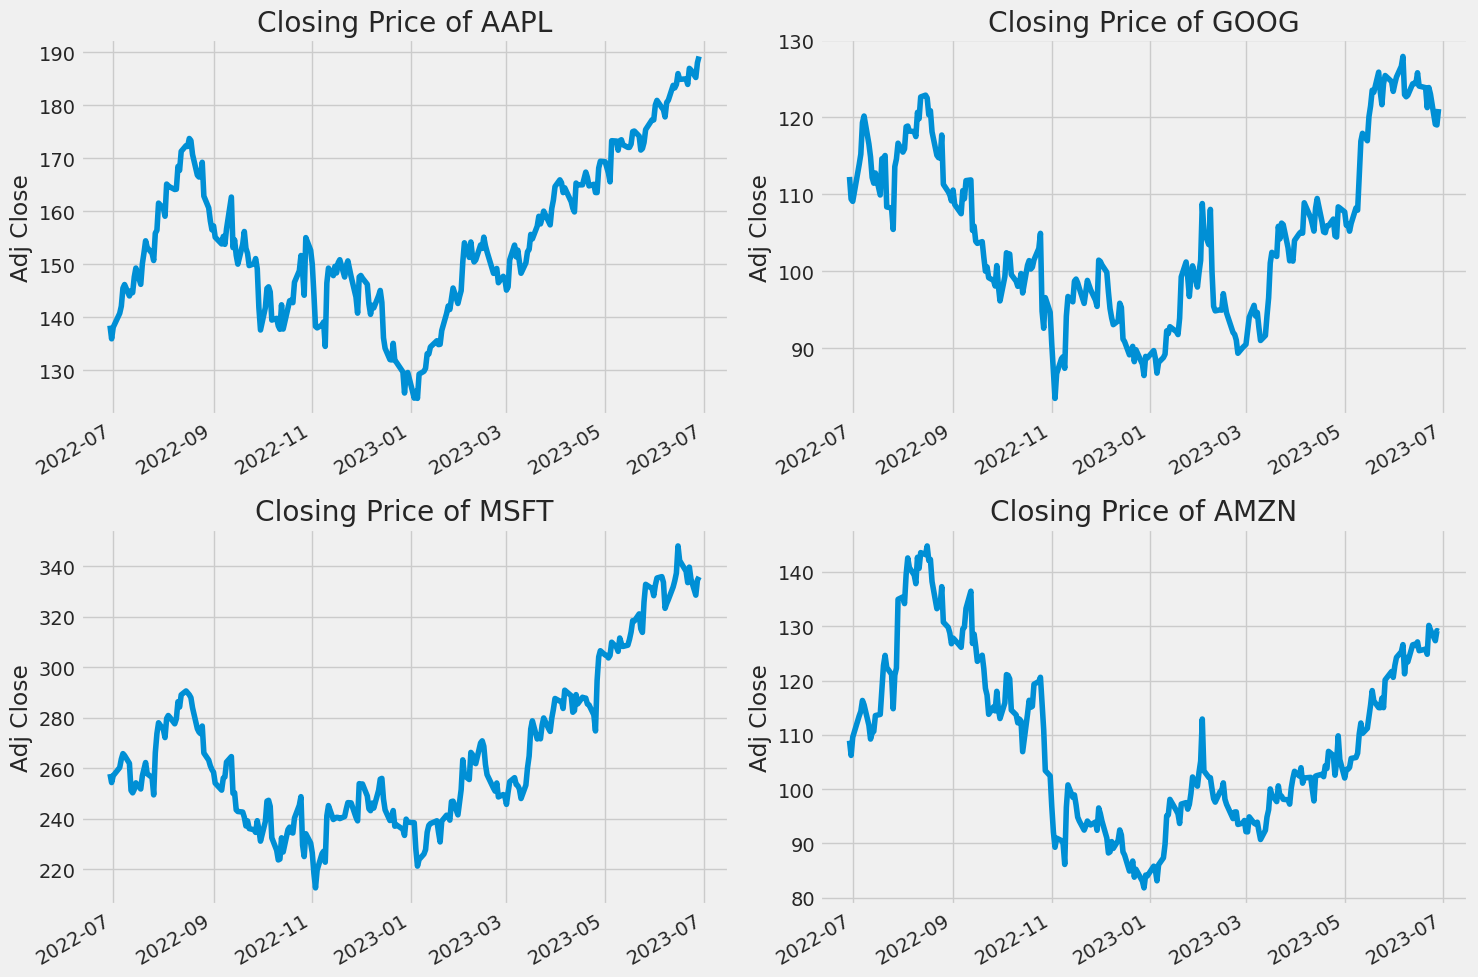

In [5]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

Matplotlib is used to visualize the closing prices of a set of tech companies. To explain it in plain English, the code starts by setting up the figure size and adjusting the subplots' layout to ensure they are properly positioned and spaced. It iterates over the company_list, containing stock data for the selected tech companies, in a loop. For each company, it creates a subplot within the larger figure. Each subplot plots the adjusted close prices (Adj Close) of the company's stock over time. The adjusted close price accounts for factors such as dividends, stock splits, or other corporate actions that may affect the stock price. In addition, the y-axis label is set to "Adj Close" to identify the type of data being plotted. It removes the x-axis label by setting it to None to avoid clutter. In addition, it sets the title of the subplot to indicate the closing price of the corresponding tech company. The title contains the ticker symbol of the company, which is retrieved from the tech_list. Finally, plt.tight_layout() is called to adjust the spacing between subplots and improve overall readability. It creates a figure with subplots displaying historical closing prices of a tech company. This tool provides insights into the relative performance of the selected tech companies by comparing stock price trends over time.

Volume of Sales refers to the amount of assets or securities that change hands over time, usually per day. A stock trading volume, for example, is the number of shares traded between its open and close each day. Technical traders use trading volume and changes in volume over time as inputs.

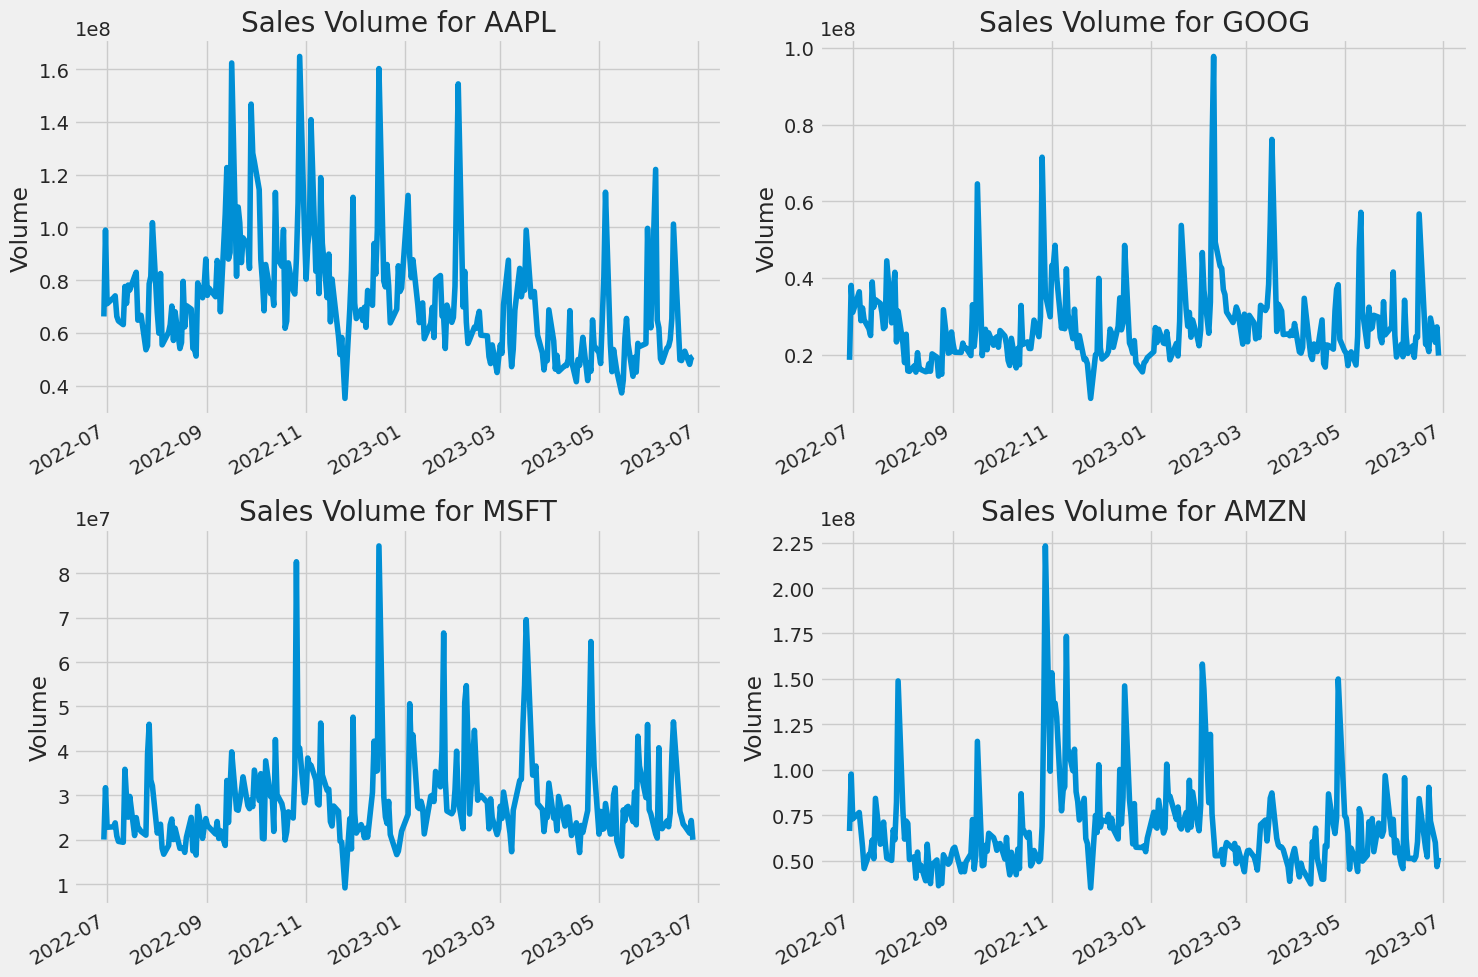

In [6]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In the provided code, a graph of the volume of stock traded each day by a set of tech companies is generated using matplotlib. In plain English, the code starts by adjusting the figure size and the layout of the subplots to make sure they're positioned and spaced correctly. Following that, the program iterates over the stock data of the selected tech companies in a loop. For each company, it creates a subplot within the larger figure. The code plots the volume of stock traded over time as part of each subplot. The volume represents the total number of shares or units of the company's stock that were traded on a given day. To display volume data, the code sets the y-axis label to "Volume." It removes the x-axis label by setting it to `None` to avoid clutter. The code also sets the subplot's title to indicate the sales volume of the corresponding tech company. The title includes the ticker symbol of the company, which is retrieved from the `tech_list`.

Finally, the `plt.tight_layout()` function is used to adjust the spacing between subplots and improve the overall readability of the chart. This code creates a figure with subplots that display the total number of shares traded each day for a technology company. This tool provides a visual representation of the trading activity and liquidity of stocks of selected tech companies over time. A plot provides insights into periods of high or low trading volume, which can be useful for assessing market trends.

Let's calculate the stock's moving average now that we've seen the closing price and volume traded each day.

What was the moving average of the various stocks? A moving average smooths out price data by creating a constantly updated average. An average is calculated over a specific time period, such as 10 days, 20 minutes, 30 weeks, or any other period selected by the trader.

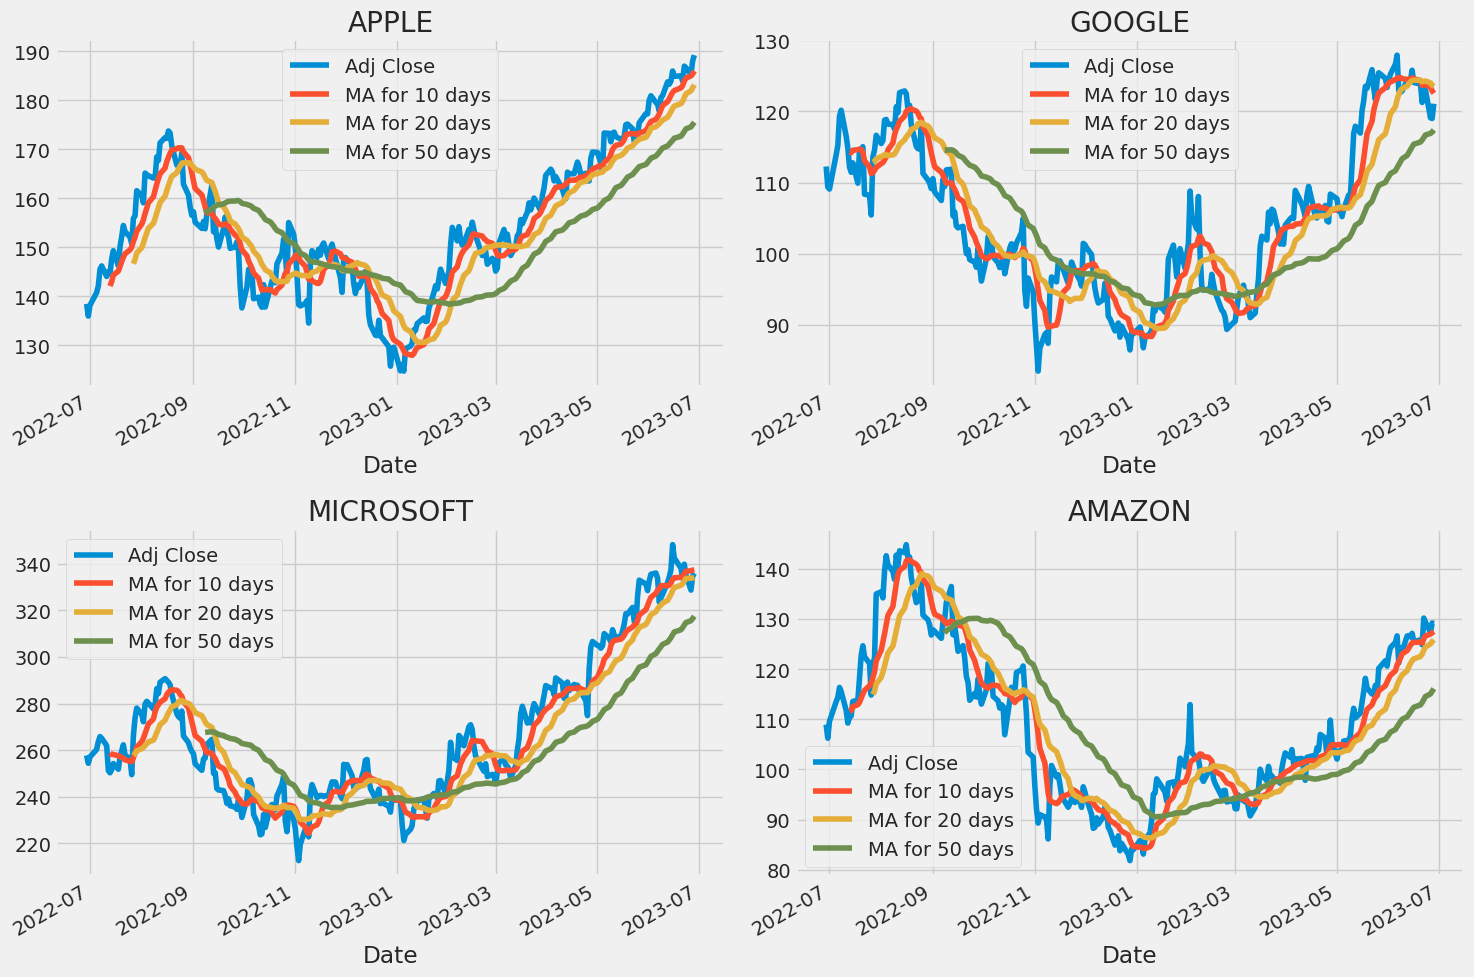

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

The provided code calculates and plots moving averages (MA) for different time periods of the adjusted closing prices for a set of tech companies.

To explain it in plain English, the code begins by defining a list called `ma_day` which contains the time periods (in days) for the moving averages to be calculated.

Next, it enters a nested loop structure. Outer loop iterates over each time period specified in ma_day. The inner loop iterates over each company in the `company_list`. For each company, the code determines the moving average of the adjusted closing prices (Adj Close) for the specified time period. It creates a new column with a name that indicates the moving average period and assigns the calculated values to that column in the respective company's dataset. Subplots are then created using the `subplots()` function. It sets the height and width of the figure accordingly. Subplots are then plotted for each company's adjusted closing prices and calculated moving averages. Each subplot represents one company and displays the adjusted closing prices as well as the moving averages for different time periods.  The code sets the title of each subplot to indicate the corresponding company's name, such as 'APPLE', 'GOOGLE', 'MICROSOFT', and 'AMAZON'.  Finally, the `fig.tight_layout()` function is called to adjust the spacing between subplots and enhance the overall layout.  In summary, this code calculates and visualizes the moving averages for different time periods of A set of tech companies' adjusted closing prices. In addition to providing insight into the trends and patterns in stock prices over time, moving averages can also be used to further analyze and interpret the data. Using the plots, you can identify potential trends or trading signals by comparing the stock prices with their corresponding moving averages.

As we can see from the graph, the best values to measure the moving average are 10 and 20 days, since we are still able to detect trends in the data without being affected by noise.

On average, how much did the stock return each day?

Let's dive a little deeper now that we've done some baseline analysis. Now let's analyze the stock's risk. To do so, we must take into account the stock's daily changes, not just its absolute value. We'll use Pandas to retrieve Apple's daily returns.

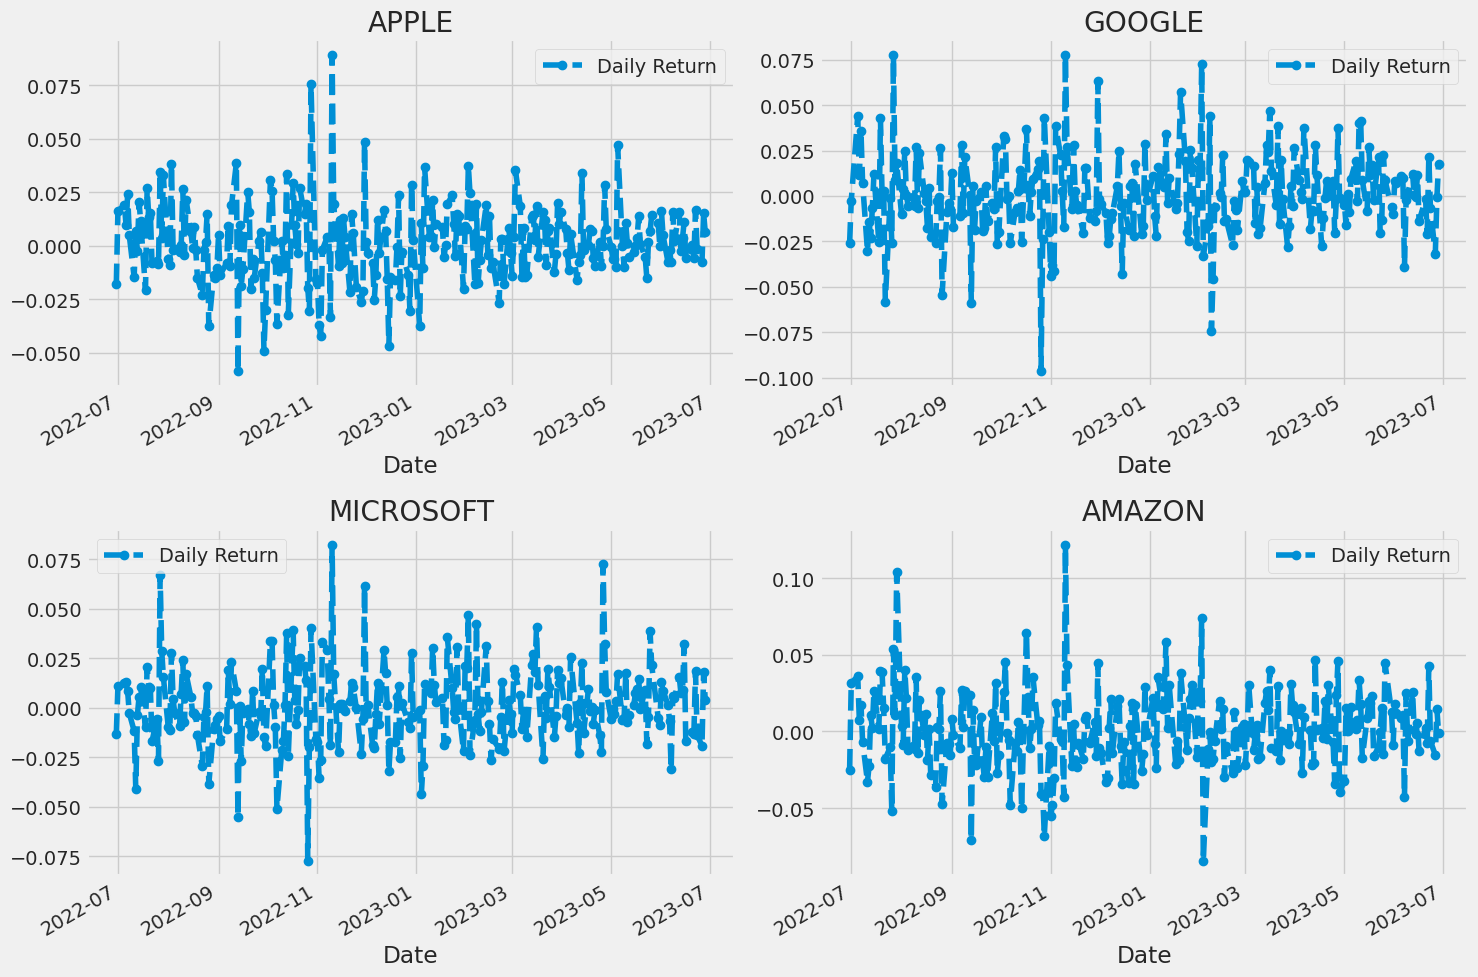

In [8]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

The provided code calculates and plots the daily percentage returns for the adjusted closing prices of a set of tech companies. Using a loop, it iterates over each company in the company_list. Within the loop, it calculates the daily percentage change (`Daily Return`) for the adjusted closing prices (`Adj Close`) of each company. The percentage change represents the rate of change from one day to the next, indicating the daily return on investment. The code creates a graph with subplots using the subplots() function. It sets the height and width of the figure accordingly. Subplots show the daily return percentages for each company. On the y-axis, each subplot represents one company and displays its daily return values. The x-axis represents the time period. Each subplot is titled according to the name of the company, such as 'APPLE', 'GOOGLE', 'MICROSOFT', and 'AMAZON'. Data points are visually represented by plot markers and linestyles. To make sure the plot elements are understood, the legend is included, as well as a function to adjust the spacing between the subplots and enhance the overall layout. To summarize, this code calculates and visualizes the daily percentage returns for a set of tech companies based on their adjusted closing prices. Daily returns provide insight into the stock's performance and volatility on a day-to-day basis. Comparing the daily returns of different companies enables the identification of patterns or trends in their stock performance.

Now let's look at a histogram of the average daily return. On the same figure, we will create both a histogram and kde plot using seaborn.

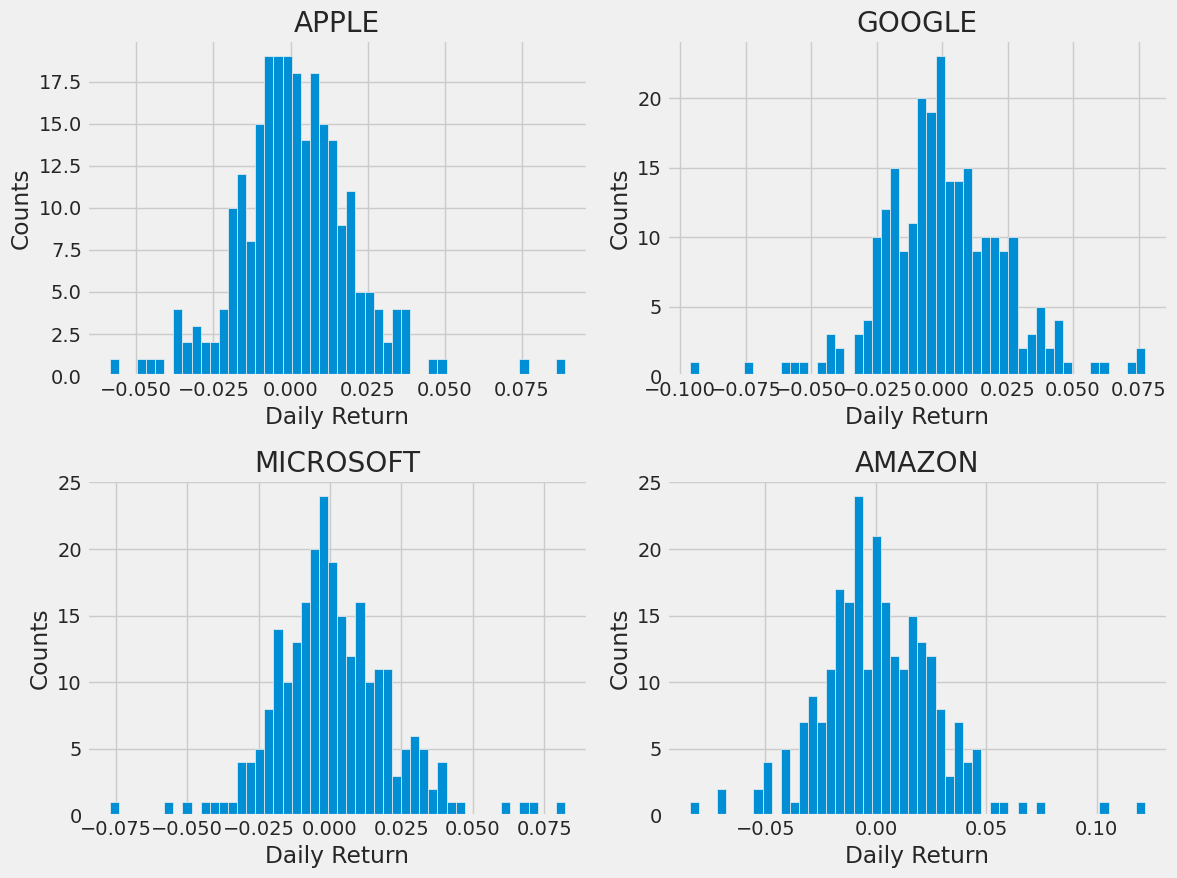

In [9]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

The provided code generates a set of histograms to visualize the distribution of daily percentage returns for a set of tech companies.

To explain it in plain English, the code starts by setting up the figure size using `plt.figure(figsize=(12, 9))`, which determines the dimensions of the overall figure.

Next, it enters a loop that iterates over the `company_list`, which contains the stock data for the selected tech companies. For each company, it creates a subplot within the larger figure. For each subplot, it plots a histogram using the `hist()` function. Histograms display the frequency or count of occurrences of different daily return values for each company. The number of bins for the histogram is set to 50, meaning the range of daily return values is divided into 50 intervals or groups. The x-axis is labeled "Daily Return" to indicate the type of data. It sets the y-axis label as "Counts" to represent the frequency of occurrence.

Additionally, the code sets the subplot's title to indicate the corresponding company's name, which is retrieved from the `company_name` list.

Finally, the `plt.tight_layout()` function is called to adjust the spacing between subplots and improve the overall layout.

In summary, this code generates histograms to visualize the distribution of daily percentage returns for a set of tech companies. In addition to providing insight into the frequency and concentration of different return values, histograms allow us to better understand the stock's risk and variability. By using the plot layout, different companies' return distributions can be compared and their performance and risk profiles can be analyzed.

How did the closing prices of different stocks correlate?

Correlation measures the degree to which two variables move in relation to each other and must fall between -1.0 and +1.0. However, correlation does not tell us if x causes y or vice versa, or if the association is due to a third factor. We want to analyze the returns of all the stocks on our list. For each stock dataframe, let's build a DataFrame that contains all the ['Close'] columns.

In [10]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-06-29,NaN,NaN,NaN,NaN
2022-06-30,-0.018028,-0.024881,-0.025691,-0.013179
2022-07-01,0.016164,0.031541,-0.002665,0.010707
2022-07-05,0.018930,0.035962,0.044059,0.012597
2022-07-06,0.009607,0.007313,0.011648,0.012783


The provided code retrieves the adjusted closing prices for a list of tech stocks and calculates the daily percentage returns for each stock.

To explain it in plain English, the code begins by using the `pdr.get_data_yahoo()` function to fetch the adjusted closing prices of the tech stocks listed in `tech_list`. The data is retrieved from Yahoo Finance and covers the specified start and end dates. In the closing_df DataFrame, each column represents a different tech stock, and each row represents a specific date. The DataFrame provides a consolidated view of the adjusted closing prices for all the tech stocks in the list. After that, the code calculates the daily percentage returns using the `pct_change()` function on the `closing_df` DataFrame. The function computes the percentage change from one row to the next, representing the daily return on investment for each stock. The resulting DataFrame, named tech_rets, contains the daily percentage returns for each tech stock. The structure is similar to `closing_df`, with each column representing a different tech stock, and each row representing a specific date.

Finally, the code displays the first few rows of the `tech_rets` DataFrame, providing an initial view of the calculated daily percentage returns for the tech stocks.

In summary, this code retrieves the adjusted closing prices for a list of tech stocks and calculates the daily percentage returns for each stock. Based on their daily returns, the resulting DataFrame can be used for further analysis and comparison of tech stocks' performance and volatility.

We can now check how correlated two stocks are by comparing their daily percentage returns. Let's see how a sotck compares to itself.

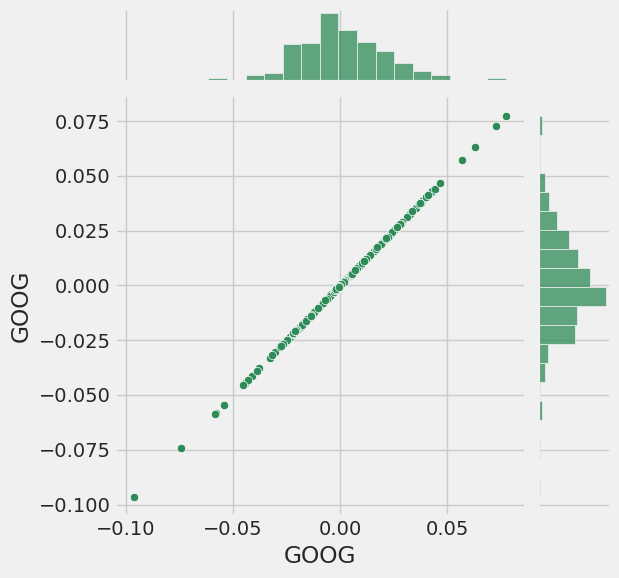

In [11]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

The provided code generates a joint plot to visualize the relationship between the daily percentage returns of Google's stock against itself. The code uses the seaborn library. A joint plot combines a scatter plot and histograms to display the relationship between two variables. Here, 'GOOG', representing Google's stock, is used as the x and y parameters for the joint plot. This means that both the x-axis and y-axis of the joint plot will represent the daily percentage returns of Google's stock. The 'kind' parameter indicates if the plot should include scatter data. The scatter plot will display the individual data points where the x-coordinate represents the daily returns of Google's stock, and the y-coordinate also represents the daily returns of Google's stock.

This code generates a joint plot to visualize the relationship between Google's daily percentage returns against itself by setting the color parameter to 'seagreen'. Due to the fact that it compares Google's returns to itself, a perfectly linear relationship is expected, as it serves as a reference for evaluating correlations and patterns.

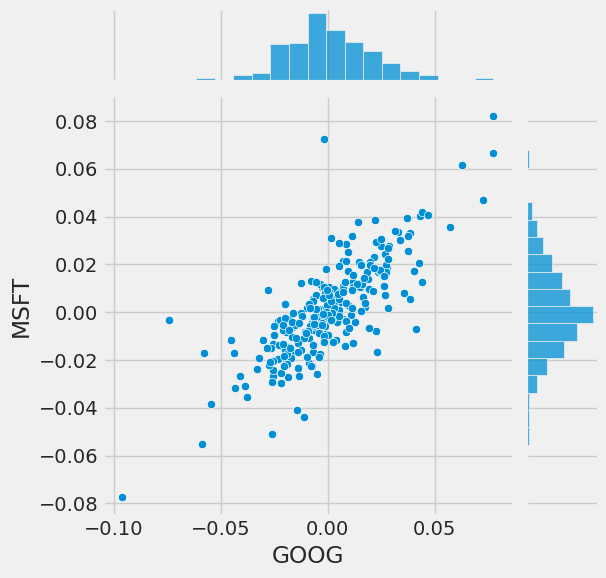

In [12]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

The provided code generates a joint plot to compare the daily percentage returns of Google's stock and Microsoft's stock.  To explain it in plain English, the code uses the seaborn library to create a joint plot, which combines a scatter plot and histograms to visualize the relationship between two variables.  In this case, the `jointplot()` function is called with the `x` parameter set to 'GOOG', representing the daily percentage returns of Google's stock, and the `y` parameter set to 'MSFT', Microsoft's stock returns are represented as a percentage on a daily basis. This means that the x-axis of the joint plot represents the daily returns of Google's stock, and the y-axis represents the daily returns of Microsoft's stock.

The `data` parameter is set to `tech_rets`, which is the DataFrame containing the calculated daily returns for the tech stocks.

The `kind` parameter is set to 'scatter', indicating that the joint plot should include a scatter plot. The scatter plot will show individual data points where the x-coordinate represents the daily returns of Google's stock, and the y-coordinate represents the daily returns of Microsoft's stock. By combining this code, a visual comparison can be made between Google's and Microsoft's daily percentage returns. It provides insight into their performance and potential interaction by assessing the relationship and potential correlation between the two stocks' returns.

Therefore, if two stocks are perfectly (and positively) correlated, a linear relationship should exist between their daily return values. 

In our technology stock ticker list, Seaborn and Pandas make it very easy to repeat this comparison analysis. This plot can be automatically created using sns.pairplot()

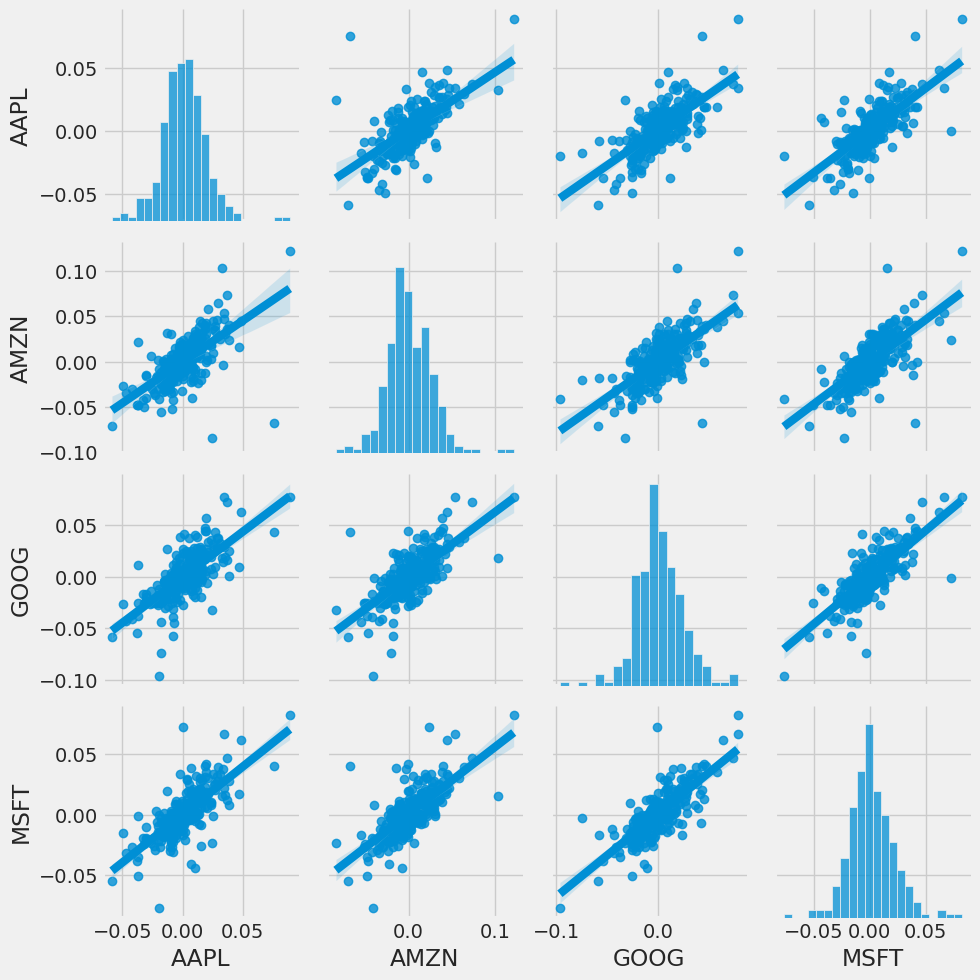

In [13]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

A pair plot is generated with the provided code to automatically analyze and compare daily percentage returns from different tech stocks. The code generates a pair plot using the seaborn library, which creates a grid of scatter plots and histograms to visualize relationships between several variables by using the seaborn library.

In this case, the `pairplot()` function is called with the `tech_rets` DataFrame as the data source. The DataFrame contains the daily percentage returns for multiple tech stocks. The 'kind' parameter indicates that regression lines should be included in the scatter plot. Regression lines help visualize the overall trend or relationship between the variables being compared. Pairplot() automatically generates scatter plots and histograms using the tech_rets DataFrame. The scatter plots compare the daily returns of two different tech stocks, while the histograms show their distribution.

The pair plot allows for a comprehensive visual analysis of the relationships and comparisons between the daily percentage returns of the tech stocks. Identifying correlations, patterns, and outliers allows further insight into the performance and interplay of tech stocks.

All the daily returns between all the stocks can be seen above. There is an interesting correlation between Google and Amazon daily returns based on a quick glance. This individual comparison might be interesting to investigate. 

While sns.pairplot() is fantastic, we can also manipulate the figure with sns.PairGrid(), including what kinds of plots appear in the diagonal, upper triangle, and lower triangle. The following example illustrates how seaborn can be used to achieve this goal.

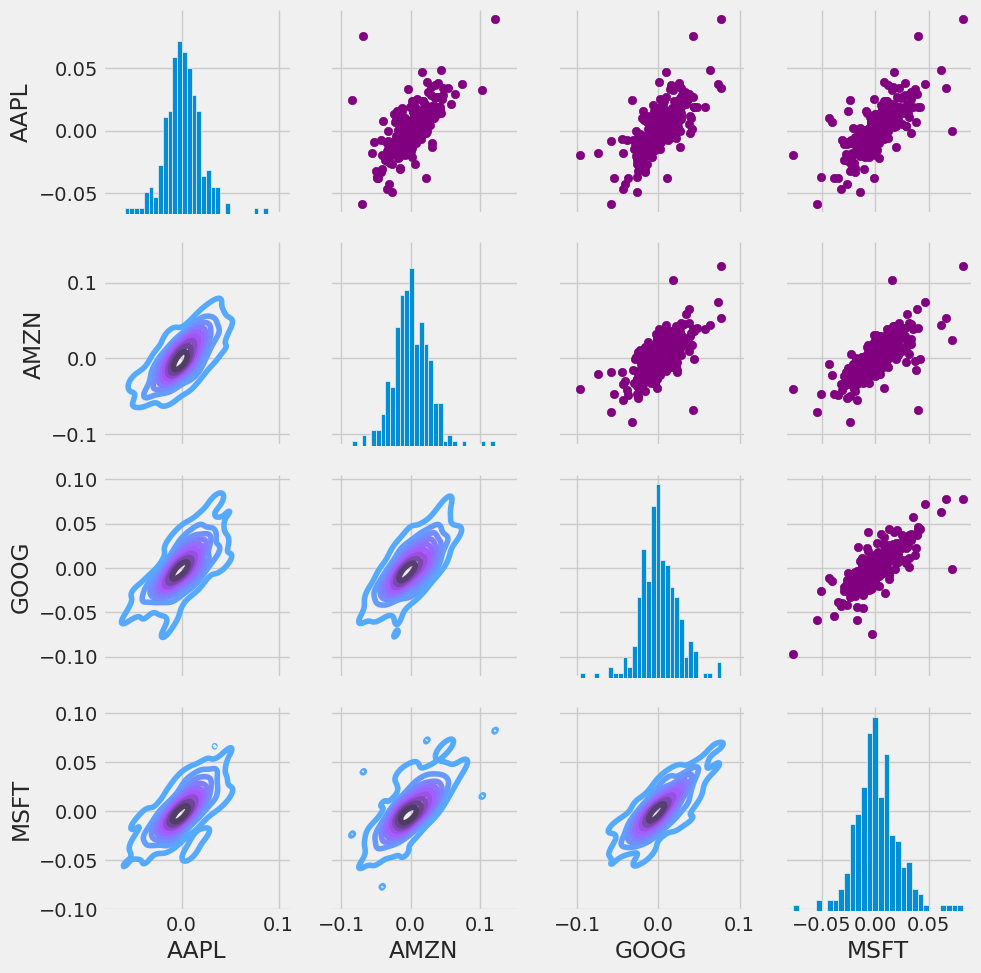

In [14]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

The provided code sets up a figure and configures the layout of subplots for visualizing the relationships and distributions of the daily percentage returns of tech stocks.

By using the seaborn library, the code creates a PairGrid figure named return_fig. A PairGrid is a grid of subplots that allows for detailed visualization and customization of pairwise relationships between variables. It uses the tech_rets DataFrame. It contains the daily percentage returns of the tech stocks. PairGrid's upper triangle is defined by map_upper(). We choose the scatter plot as the plot type, and we set the color to purple. This means that the upper triangle of the PairGrid will display scatter plots representing the relationships between the daily returns of different tech stocks. The lower triangle of the PairGrid is defined using the map_lower() function. The plot type is kernel density estimation (kde), and the color map is cool_d. This means that the lower triangle of the PairGrid will display kde plots representing the distributions of the daily returns for different tech stocks. To define the diagonal of the PairGrid, the map_diag() function is called. Hexagon plots are chosen as the plot type, and 30 bins are selected as the number of bins. As a result, the diagonal of the PairGrid displays histograms that represent the daily return distribution for each tech stock individually. To visualize the relationships and distributions of the daily percentage returns of tech stocks, this code creates a customized figure with a PairGrid layout. In addition to highlighting patterns, correlations, and distributions in the data, it allows for a comprehensive analysis of pairwise relationships.

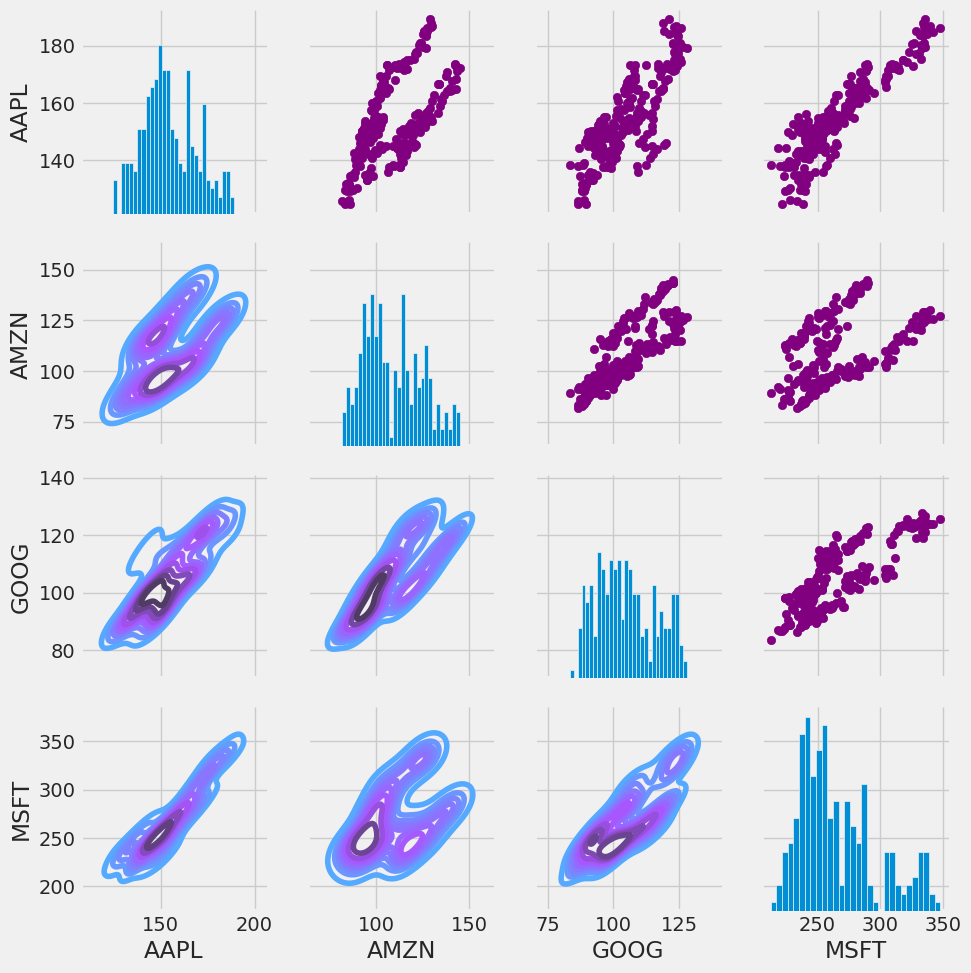

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

The provided code sets up a figure and configures the layout of subplots for visualizing the relationships and distributions of the closing prices of tech stocks. In plain English, it creates a PairGrid figure named returns_fig. A PairGrid is a grid of subplots that allows for detailed visualization and customization of pairwise relationships between variables.

The `closing_df` DataFrame, which contains the closing prices of the tech stocks, is used as the data source for the PairGrid.

The `map_upper()` function is called to define the appearance of the upper triangle of the PairGrid. The plot type is scatter plot, and the color is purple. This means that the upper triangle of the PairGrid will display scatter plots representing the relationships between the closing prices of different tech stocks. A map_lower() function can be called to define the look of the lower triangle. The plot type is kernel density estimation (kde), and the color map is cool_d. This means that the lower triangle of the PairGrid will display kde plots representing the distributions of the closing prices for different tech stocks. The diagonal of the PairGrid is defined using the map_diag() function. The plot type is histogram, and the number of bins is 30. This means that the diagonal of the PairGrid will display histograms representing the distribution of the closing prices for each individual tech stock. To visualize the relationship and distribution of closing prices of tech stocks, this code creates a customized figure with a PairGrid layout. Using this method, you can analyze pairwise relationships in depth, highlighting patterns, correlations, and distributions.

Also, we could plot the correlation between the stocks' daily return values using a correlation plot. A comparison of Microsoft and Apple's closing prices reveals an interesting relationship.

Text(0.5, 1.0, 'Correlation of stock closing price')

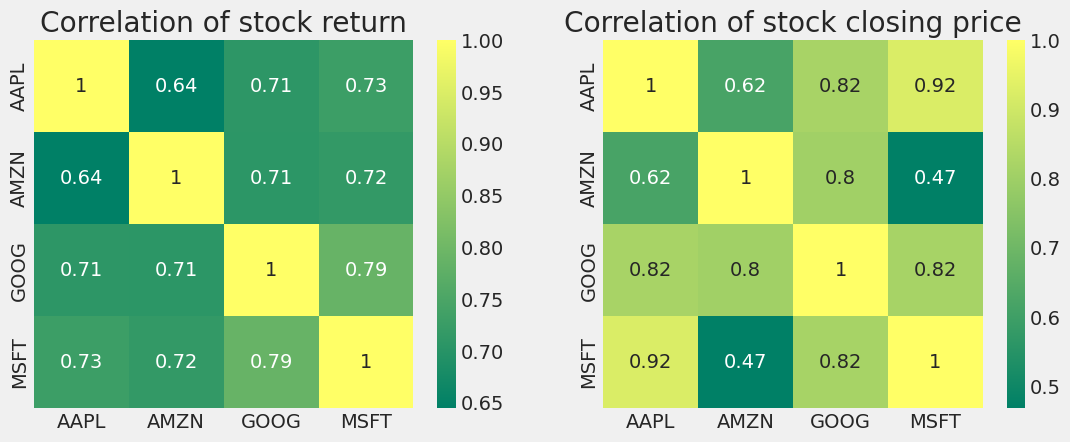

In [16]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

The provided code generates two heatmaps to visualize the correlation between the daily percentage returns of tech stocks and the correlation between the closing prices of tech stocks.

To explain it in plain English, the code begins by setting up the figure size using `plt.figure(figsize=(12, 10))`, which determines the dimensions of the overall figure.

Next, it creates a subplot layout with two rows and two columns using `plt.subplot(2, 2, 1)` and `plt.subplot(2, 2, 2)`. This layout allows for two heatmaps to be displayed side by side. The code generates the first heatmap using the `sns.heatmap()` function on the `tech_rets.corr()` DataFrame. The heatmap represents the correlation matrix of tech stock returns on a daily basis. Colors represent correlation values, with higher values indicating stronger positive or negative correlations. Heatmaps with annot=True are annotated numerically with correlation values. This parameter sets the color scheme to a summer-themed palette. The subplot is given the title 'Correlation of stock return'. A second heatmap is generated in the second subplot (top-right), using the `closing_df.corr()` DataFrame. The heatmap represents the correlation matrix of the closing prices of tech stocks. Colors indicate correlation values, with higher values indicating stronger positive or negative correlations. The `annot=True` parameter adds numerical annotations to the heatmap, indicating correlations. Cmap='summer' sets a summer-themed color scheme. The subplot is given the title 'Correlation of stock closing price'. The code provides two heatmaps that illustrate the correlation between the daily percentage returns and the closing prices of the tech stocks. The heatmaps help identify potential relationships and dependencies among stocks, allowing insight into their performance and potential diversification.

Microsoft and Amazon had the strongest correlation of daily stock returns numerically and visually, just as we suspected from our PairPlot. Interestingly, all the technology companies are positively correlated.

By investing in a particular stock, how much value are we putting at risk?

The most basic way to quantify risk is to compare the expected return with the standard deviation of the daily percentage returns based on the information we've gathered.

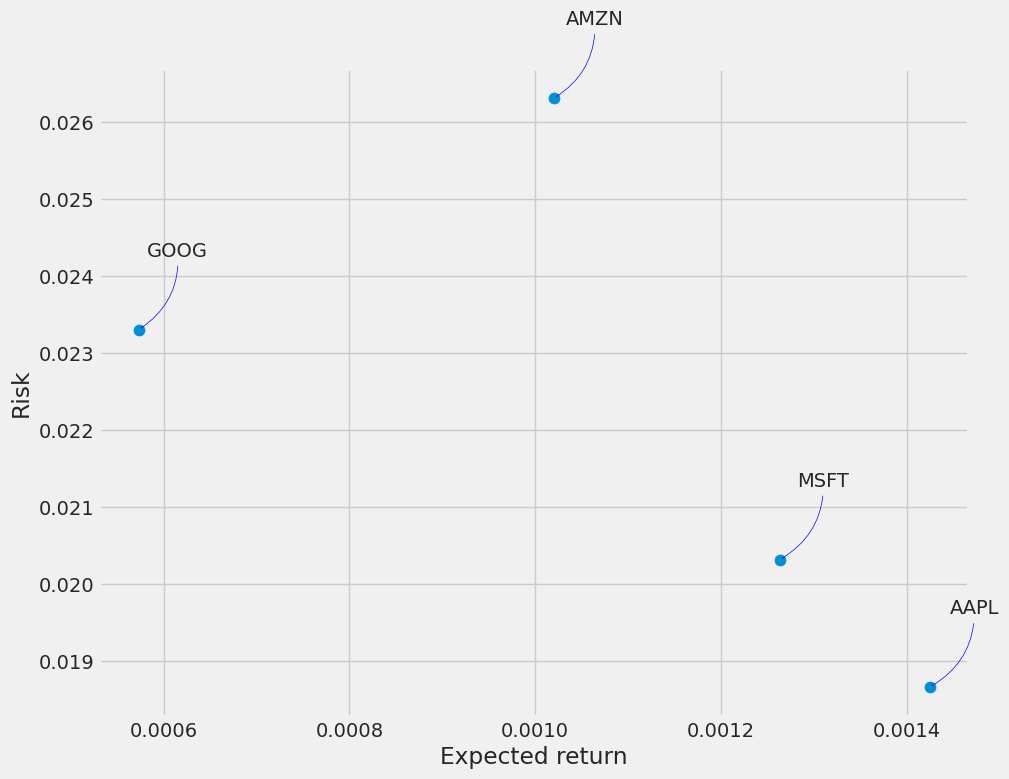

In [17]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

The provided code generates a scatter plot to visualize the relationship between the expected returns and the risk of tech stocks.

To explain it in plain English, the code starts by dropping any rows with missing values (NaN) from the `tech_rets` DataFrame and assigns the resulting DataFrame to a new variable called `rets`.

Next, it defines the size of the markers in the scatter plot by calculating the area using the formula `np.pi * 20`. This determines the size of the markers representing the tech stocks on the plot.

The code sets up the figure size using `plt.figure(figsize=(10, 8))`, which determines the dimensions of the overall figure.

Then, it generates the scatter plot by calling `plt.scatter()` with the `rets.mean()` (expected return) on the x-axis and `rets.std()` (risk) on the y-axis. The size of the markers is set using the `s` parameter.

The x-axis is labeled as 'Expected return', and the y-axis is labeled as 'Risk' using the `plt.xlabel()` and `plt.ylabel()` functions, respectively.

It annotates each point on the scatter plot with the appropriate tech stock label using a loop. Each stock's label, x-coordinate (mean return), and y-coordinate (standard deviation of return) are retrieved from the rets DataFrame. This function is used to add the label text, specify the position, and customize the appearance of the annotation to the plot. As a whole, this code generates a scatter plot illustrating the relationship between tech stocks' expected returns and their risks. Investment decisions are based on the trade-off between expected returns and risk tolerance and allow the identification of stocks with different risk-return profiles. The annotations provide additional information by labeling each point with the corresponding stock name, improving the readability of the plot.

APPLE INC. stock price prediction:

In [18]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482927,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550009,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689342,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821995,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801654,394024400
...,...,...,...,...,...,...
2023-06-22,183.740005,187.050003,183.669998,187.000000,187.000000,51245300
2023-06-23,185.550003,187.559998,185.009995,186.679993,186.679993,53079300
2023-06-26,186.830002,188.050003,185.229996,185.270004,185.270004,48088700


This code retrieves Apple Inc. stock quote data. (AAPL) from Yahoo Finance for a specific time period.

To explain it in plain English, the code uses the `pdr.get_data_yahoo()` function to fetch the stock quote data for the ticker symbol 'AAPL'. The data is retrieved from Yahoo Finance.

The `start` parameter is set to '2012-01-01', indicating the starting date for which the stock quote data is requested.

The `end` parameter is set to `datetime.now()`, representing the current date and time. This specifies the end date for the retrieved data, ensuring that it includes the most recent available information. Stock quote data is stored in a DataFrame named `df`. A DataFrame contains various stock information, such as the opening price, closing price, high and low prices, volume, and adjusted closing price. Each row in the DataFrame represents a specific date, and each column represents a different attribute of the stock.

By displaying the `df` DataFrame, the code provides an overview of the historical prices and other relevant information for Apple Inc.'s stock. The code retrieves and displays Apple Inc. stock quote information. Further analysis and examination of the stock's historical performance and characteristics is possible through Yahoo Finance.

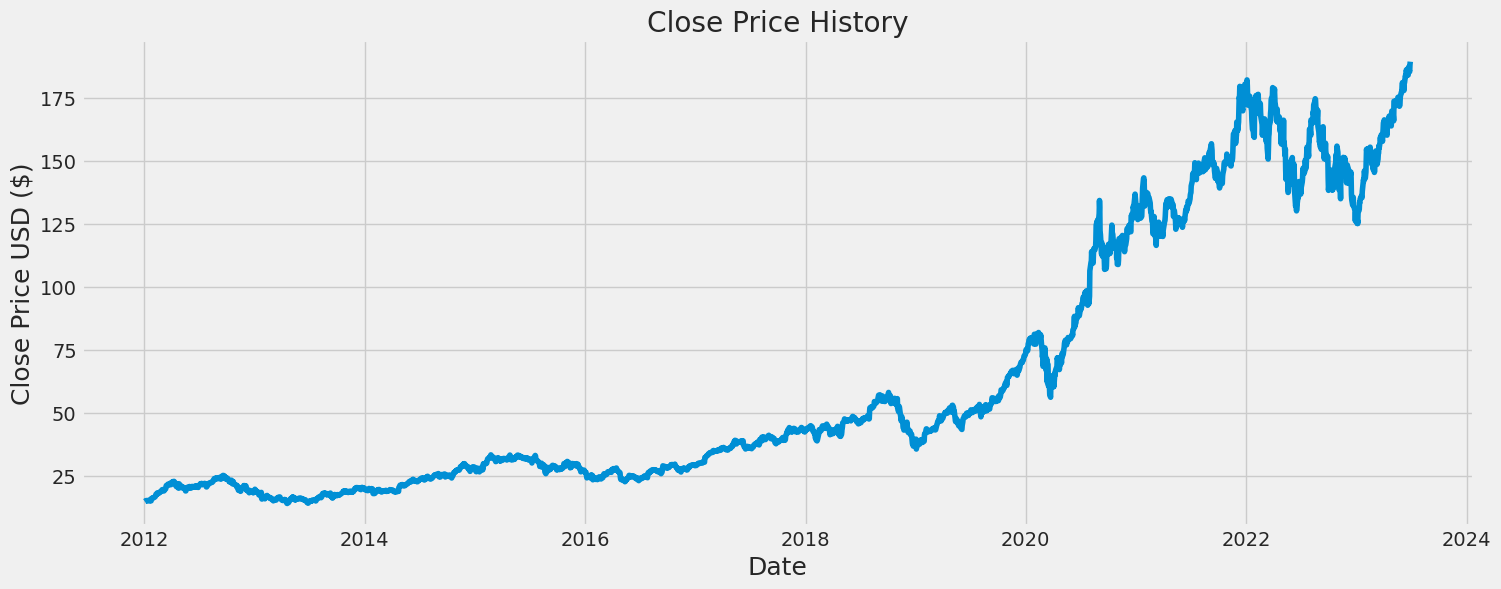

In [19]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

The provided code generates a line plot to visualize the historical closing price of a stock.

To explain it in plain English, the code starts by setting up the figure size using `plt.figure(figsize=(16,6))`, which determines the dimensions of the overall figure.

Next, it sets the title of the plot as 'Close Price History' using `plt.title()`, providing a descriptive title for the plot.

Then, it plots the closing price data using `plt.plot(df['Close'])`. It has the historical closing prices for each stock listed in the 'Close' column. It uses a line plot to connect the closing price values over time, allowing for a visual representation of the price movement. The x-axis is labeled 'Date' using plt.xlabel(), indicating that the horizontal axis represents different dates. The fontsize parameter is set to 18 to adjust the size of the label for better readability. The plot y-axis is labeled as 'Close Price USD ($)' with plt.ylabel(), indicating the stock's closing price in USD. The fontsize parameter is set to 18 to adjust the size of the label for better readability.

Finally, the plot is displayed using `plt.show()`, showing the line plot of the historical closing prices.

Overall, this code generates a line plot that visualizes the historical closing price of a stock over time. It allows for observation of patterns, trends, and potential changes in a stock's value by providing a straightforward representation of its price trend.

In [20]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2746

The provided code prepares the data for training a model by determining the length of the training data. In plain English, the code performs the following steps: 1. It creates a new DataFrame named `data` that includes only the 'Close' column from the `df` DataFrame. This column represents a stock's closing price. The DataFrame is converted into an array using Numpy, and the array is assigned to the dataset variable. As a result of this conversion, the data can be more easily manipulated and analyzed. The training data length is calculated by multiplying the total number of rows in the `dataset` array by 0.95 (95%). The result is then rounded up to the nearest whole number using `np.ceil()` to improve the likelihood that the training data includes a significant portion of the data. The calculated length of the training data is stored in the variable `training_data_len`.

In this code, the 'Close' column is extracted from the dataset, converted into a numpy array, and the training data length is determined based on a specified percentage (95%) of the entire dataset. During the training process, the length of the training data determines the number of data points that will be used to build the model's predictive capability.

In [21]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0042172 ],
       [0.00466744],
       [0.00560256],
       ...,
       [0.97729641],
       [0.99321172],
       [1.        ]])

The provided code performs data scaling on a given dataset using the Min-Max scaling technique. In plain English, the code uses the MinMaxScaler class from the Sklearn.preprocessing module. Scaling is a common preprocessing step that transforms the data to a specific range. First, an instance of the MinMaxScaler class is created and assigned to the variable scaler. As a result, the scaler object is called using the fit_transform() method, passing the dataset as the transform data for the feature_range parameter. This method fits the scaler on the data and simultaneously applies the scaling transformation. Scaled data is stored in the variable scaled_data. Throughout the array, each value is a scaled version of its corresponding value in the original dataset, ensuring that all values fall within a specified range. The code converts the data to a standard range by using Min-Max scaling on the given dataset. Various machine learning algorithms and techniques that assume normalized input can benefit from scaling the data. By bringing all values within a common scale, it helps maintain data integrity and comparability.

In [22]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.0042172 , 0.00466744, 0.00560256, 0.00649286, 0.00635636,
       0.00666399, 0.00652341, 0.00628709, 0.00596519, 0.00696143,
       0.00785988, 0.00758281, 0.00606502, 0.00751354, 0.00608743,
       0.01143533, 0.01102177, 0.01156165, 0.01272901, 0.01343595,
       0.01337687, 0.01315889, 0.01408789, 0.01496189, 0.01595202,
       0.0175513 , 0.02091079, 0.02096172, 0.02283196, 0.02422954,
       0.02182758, 0.02275251, 0.02273417, 0.02532765, 0.02495889,
       0.02564139, 0.02686784, 0.02755034, 0.02951633, 0.03094854,
       0.03136211, 0.03150676, 0.02905794, 0.02846712, 0.02855472,
       0.03085687, 0.03150473, 0.0328962 , 0.03617624, 0.04055235,
       0.03973336, 0.03973539, 0.04289931, 0.04388945, 0.04318453,
       0.04254075, 0.04187048, 0.04409724, 0.04562522, 0.04626493])]
[0.044683982352674345]

[array([0.0042172 , 0.00466744, 0.00560256, 0.00649286, 0.00635636,
       0.00666399, 0.00652341, 0.00628709, 0.00596519, 0.00696143,
       0.00785988, 0.00758281, 0.0

In the provided code, the training data for a machine learning model is prepared. It involves creating the input features (`x_train`) and the corresponding target values (`y_train`). To begin, a variable named train_data will be created to store the scaled training data. This data is obtained by scaling the original dataset.

Next, the code initializes two empty lists, `x_train` and `y_train`, which will be populated with the input features and target values, respectively.

Using a loop, the code iterates over the `train_data` array starting from index 60. Every iteration, 60 consecutive values from the array, representing the input features, are appended to `x_train`. Additionally, it appends the value at the current index (i) to `y_train`, representing the corresponding target value.

In the first two iterations of the loop (when `i` is 60 and 61), the code prints the values of `x_train` and `y_train` to provide a glimpse of the data structure.

After the loop, the code converts `x_train` and `y_train` from lists to numpy arrays using the `np.array()` function.

Next, the code reshapes the `x_train` array using `np.reshape()`. Reshaping is done to match the input shape expected by the machine learning model. Typically, models require input data in the form of samples, timesteps, and features. Here, an additional dimension of size 1 is added to represent the number of features.

Finally, the code outputs the shape of `x_train` to provide information about the dimensions of the reshaped data.

In summary, this code prepares the training data by creating the input features (`x_train`) and target values (`y_train`) for the machine learning model. From the scaled training data, 60 consecutive values are selected as input features, and the following values are assigned as targets. Input features are reshaped to match the model's expected format, facilitating training.

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

2686/2686 [==============================] - 60s 21ms/step - loss: 0.0013


The provided code utilizes the Keras library to build, compile, and train a Long Short-Term Memory (LSTM) model.

To explain it in plain English, the code performs the following steps:

First, it imports the necessary modules from Keras, including `Sequential` for creating a sequential model and `Dense` and `LSTM` for adding layers to the model.

The code then proceeds to build the LSTM model. Using Sequential(), it creates a sequential model object that allows layers to be added sequentially. 

The model is then constructed by adding layers. An LSTM layer with 128 units is added as the first layer. The input shape of this layer is defined by `LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1))`. When return_sequences=True, the LSTM layer should return the full sequence of outputs rather than just the last. The `input_shape` parameter defines the shape of the input data, based on the shape of `x_train`. A second LSTM layer follows. LSTM(64, return_sequences=False) specifies this layer with 64 units. Here, `return_sequences=False` indicates that this LSTM layer should only return the last output in the sequence. Next, two dense layers are added. A dense layer has 25 units, defined by `Dense(25)`. Each neuron in a dense layer is connected to every neuron in the previous layer. In the second dense layer, there is only one unit, specified by `Dense(1)`. This layer represents the output layer of the model, responsible for predicting a single value. The code compiles the model using model.compile(). The `optimizer` parameter is set to 'adam', an optimization algorithm for adjusting a model's weights during training. The `loss` parameter is set to 'mean_squared_error', which is the loss function used to measure the difference between the predicted output and the actual target value. The model is trained using the function 'model.fit()'. Function h_train contains x training data and y training data. It is set to 1, indicating that the model should update its weights after each sample. The `epochs` parameter is set to 1, representing the number of times the model will iterate over the entire training dataset during the training process. To summarize, this code builds two LSTM layers followed by dense layers. Using the specified training data and target values, it compiles the model with an optimizer and loss function. Using the trained model, you can make predictions or analyze the data further.

In [24]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 19ms/step


6.348973105122507

In the provided code, the data is prepared, the trained model is used to make predictions, and the root mean squared error (RMSE) is used to evaluate the model's performance. In plain English, the code performs the following steps: First, it extracts a subset of the scaled data to create a testing data set. The `test_data` array includes scaled values from index 1543 to the end of the `scaled_data` array. This subset of data will be used for evaluating the model's predictions. The next step is to initialize two empty lists, x_test and y_test. These lists will store the input features and target values, respectively, for testing the model's predictions. The code iterates over the array starting at index 60. During each iteration, it appends a sequence of 60 consecutive values from the array to `x_test`, representing the input features for testing.

After the loop, the `x_test` list is converted to a numpy array, enabling compatibility with the model's requirements.

The data in `x_test` is reshaped using `np.reshape()` to match the expected input shape of the model. This reshaping ensures that the dimensions of the data align with the training data, facilitating consistent processing. Finally, the model is used to predict the price values for the testing data. The predicted values are stored in the `predictions` variable.

To obtain the actual predicted price values, the code inverse transforms the values in `predictions` to their original scale using `scaler.inverse_transform()`.

Finally, the code computes the root mean squared error (RMSE) to evaluate the model's performance. The RMSE is calculated by taking the square root of the mean of the squared differences between the predicted values (`predictions`) and the actual values (`y_test`).

As a result, this code prepares the testing data, creates predictions using the trained model, and evaluates the accuracy of the predictions by measuring the RMSE. RMSE measures the dissimilarity between predicted and actual values, providing a measure of how well a model predicts.

/tmp/ipykernel_32/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


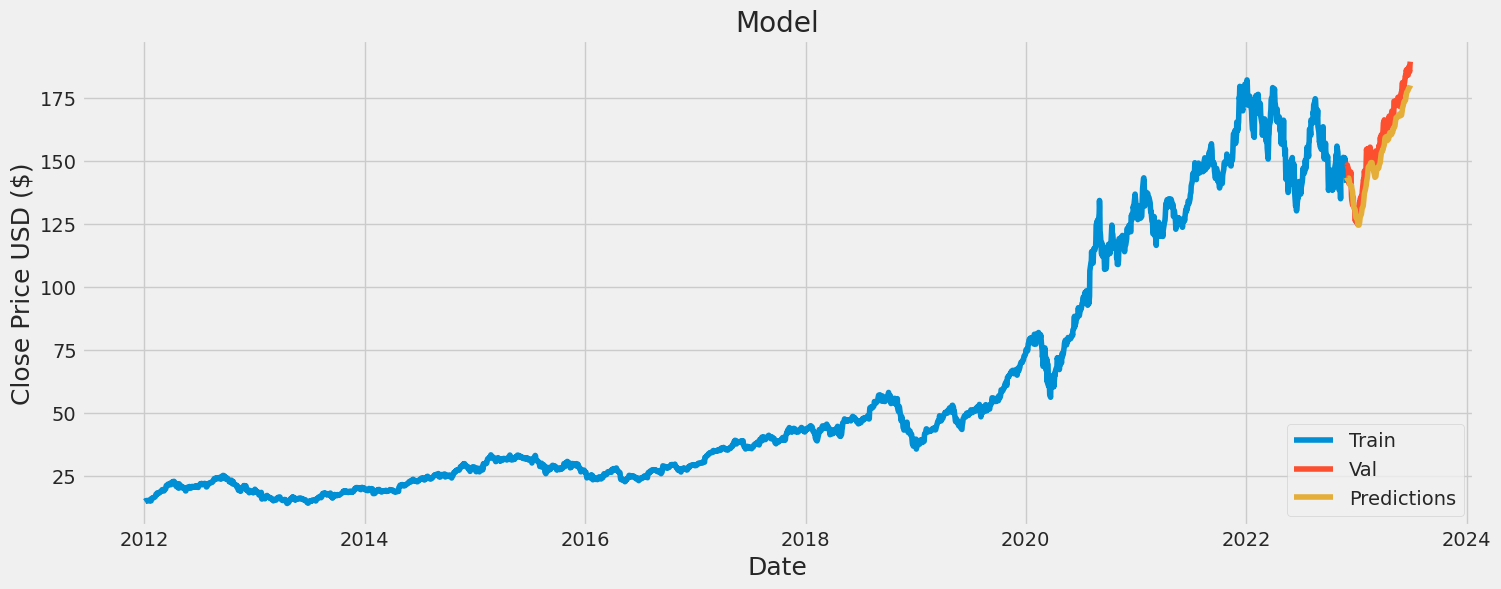

In [25]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In order to visualize and compare the actual and predicted close prices, the provided code plots the training and validation data, as well as the predicted values generated by the trained model. In plain English, the code creates two subsets of the original data: `train` and `valid`. The `train` subset contains the data up to the training data length, while the `valid` subset includes the remaining data that was used for validation.

Next, the code adds a new column to the `valid` subset called 'Predictions', which stores the predicted values generated by the model.

After preparing the data, the code proceeds to plot the information. PLT.figure(figsize=(16,6)) creates a figure with a specified size. The size of the figure determines the dimensions of the resulting plot.

The plot is given a title using `plt.title('Model')`, indicating that it represents the model's ability to predict close prices. A plot of 'Date' is displayed with 'Close Price USD ($)' as the x-axis. The plot is then used to plot the training data by using `plt.plot(train['Close'])`. This line graph visualizes the actual close prices from the training data. It also shows two lines: one representing the actual close prices from the validation data, and another representing the predicted values. These lines are plotted using `plt.plot(valid[['Close', 'Predictions']])`. The legend is added using `plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')`. This legend provides labels for the different lines in the plot, indicating which line corresponds to the training data, validation data, and predicted values.

Finally, the plot is displayed using `plt.show()`, allowing the visualization of the training and validation data alongside the predicted values.

This code plots the validation and training data as well as the predicted values, enabling a visual comparison of the real and predicted close prices. Using this visualization, you can assess the model's performance and understand how well it captures underlying patterns.

In [26]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-11-30,148.029999,143.286102
2022-12-01,148.309998,142.734497
2022-12-02,147.809998,142.759521
2022-12-05,146.630005,142.978836
2022-12-06,142.910004,143.075790
...,...,...
2023-06-22,187.000000,178.342697
2023-06-23,186.679993,178.789963
2023-06-26,185.270004,179.228653


In the code provided, you will see both the valid prices and the predicted prices generated by the model, which are the actual close prices from the validation data. In plain English, the code simply prints out the `valid` variable, which contains the actual close prices from the validation data. This provides a visual representation or a tabular display of the valid prices. These are the close prices for a specific period, usually after training. In comparison with the predicted prices generated by the model, these prices serve as a benchmark. In order to determine whether a model is accurate or efficient at forecasting or estimating the close price of the financial asset being analyzed, it is necessary to examine the valid prices alongside the predicted prices.

In this notebook, you explored stock data. You learned: - How to load stock market data from Yahoo Finance using yfinance. - How to explore and visualize time series using Pandas, Matplotlib, and Seaborn. - How to measure correlation between stocks. - How to measure the risk of investing in a particular stock. Have questions? Leave them in the comments below and I will be happy to answer them.  References: [Jose Portilla Udemy Course: Learning Python for Data Analysis and Visualization] (https://www.udemy.com/course/learning-python-for-data-analysis-and-visualization/)